<a href="https://colab.research.google.com/github/SandyGgit/DataScience/blob/master/Develop_a_Single_Neuron_Model_to_Convert_C_to_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project:** Build a simple Machine Learning model to convert from Celsius to Fahrenheit 
*   Equation: T(F) = T(C) x 9/5 + 32 


**Sandy Garcia**

# **STEP #1: Import Libraries**

In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0

  Using cached https://files.pythonhosted.org/packages/a9/51/aa1d756644bf4624c03844115e4ac4058eff77acd786b26315f051a4b195/tb_nightly-1.14.0a20190301-py3-none-any.whl
ERROR: tf-nightly 2.1.0.dev20191203 has requirement tb-nightly<2.2.0a0,>=2.1.0a0, but you'll have tb-nightly 1.14.0a20190301 which is incompatible.
  Found existing installation: tb-nightly 2.1.0a20191205
    Uninstalling tb-nightly-2.1.0a20191205:
      Successfully uninstalled tb-nightly-2.1.0a20191205


In [4]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
#!pip install --upgrade tensorflow

# For a specific version:
#!pip install tensorflow==1.2

# For the latest nightly build:
#!pip install tf-nightly

Name: tensorflow
Version: 2.0.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: grpcio, gast, protobuf, tensorflow-estimator, wheel, tensorboard, opt-einsum, keras-applications, numpy, six, absl-py, wrapt, astor, termcolor, keras-preprocessing, google-pasta
Required-by: stable-baselines, magenta, fancyimpute


In [0]:
import tensorflow as tf
import seaborn as sns
import pandas as pd                
import numpy as np                 
import matplotlib.pyplot as plt

# **STEP #2: Import Dataset**

In [0]:
# Mount Drive 
from google.colab import drive
drive.mount('/content/drive')

In [0]:
temp_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Celsius to Fahrenheit.csv')

In [20]:
temp_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [16]:
temp_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [17]:
# Descriptive Statistics 
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [18]:
# Print Summary of a dataframe 
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


## **STEP #3 Visualize Dataset**

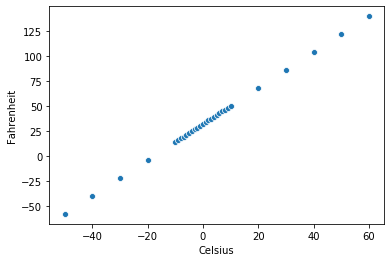

In [21]:
# Draw scatterplot. Relationship between x and y
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])

# **STEP #4: Create Testing and Training Dataset**

In [0]:
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

## **STEP #5: Build and Train the Model**

In [44]:
X_train.shape

(30,)

In [45]:
y_train.shape

(30,)

In [0]:
# Build model using Keras api in a sequetial fashion
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile Model. Use "Adam" optimizer to train the model
model.compile(optimizer = tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')

In [53]:
# Train out model. Use fit method to our model and pass the training data. 
epochs_hist = model.fit(X_train, y_train, epochs = 500)

Train on 30 samples
Epoch 1/500
30/30 [==============================] - 0s 8ms/sample - loss: 1097.0796
Epoch 2/500
30/30 [==============================] - 0s 95us/sample - loss: 1137.4341
Epoch 3/500
30/30 [==============================] - 0s 115us/sample - loss: 957.8485
Epoch 4/500
30/30 [==============================] - 0s 99us/sample - loss: 839.3444
Epoch 5/500
30/30 [==============================] - 0s 178us/sample - loss: 857.0560
Epoch 6/500
30/30 [==============================] - 0s 120us/sample - loss: 798.4803
Epoch 7/500
30/30 [==============================] - 0s 106us/sample - loss: 686.7373
Epoch 8/500
30/30 [==============================] - 0s 102us/sample - loss: 627.4758
Epoch 9/500
30/30 [==============================] - 0s 110us/sample - loss: 616.7096
Epoch 10/500
30/30 [==============================] - 0s 127us/sample - loss: 578.7413
Epoch 11/500
30/30 [==============================] - 0s 111us/sample - loss: 505.1456
Epoch 12/500
30/30 [==============

# **STEP #6 Evaluate the Model** 

In [54]:
epochs_hist.history.keys()

dict_keys(['loss'])

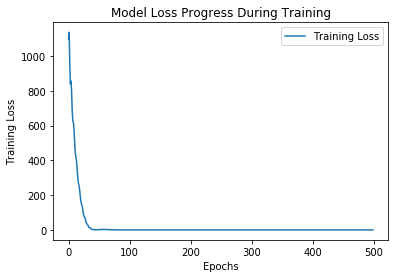

In [56]:
# Use matplotlib to visualize the loss
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [57]:
# Values of the Weights (W and BIAS). Use Weight (W) and Bias that can map the data 
model.get_weights()

# Get the coeff of the equation (9/5 = 1.8 and 32). Pass input and output data 

[array([[1.8000001]], dtype=float32), array([32.], dtype=float32)]

In [62]:
# Deploy in practice 

Temp_C = 32  # Temperature in Celsius 

Temp_F = model.predict([Temp_C])
print('Temperature in DegF using ANN', Temp_F)

Temperature in DegF using ANN [[89.600006]]


In [63]:
# Confirm with the equation 
Temp_F = 9/5 * Temp_C + 32
print('Temperature in Degree F using Trained ANN=', Temp_F)

Temperature in Degree F using Trained ANN= 89.6
